In [1]:
import data_preprocessing
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# how to Daten einlesen
"""
Das Einlesen von Beschleunigungsdaten funktioniert gut. Der Code zum Einlesen von Gyroscopdaten muss noch dementsprechend angepasst werden.
"""
# Mac Raoul
data_Ger_Acc = data_preprocessing.extract_accelerometer_data(r'/Users/raouldoublan/Documents/GitHub/Boxschlag-Klassifikation/data/Max_Gerade.csv', 250)
data_Kopf_Acc = data_preprocessing.extract_accelerometer_data(r'/Users/raouldoublan/Documents/GitHub/Boxschlag-Klassifikation/data/Max_Kopfhacken.csv')
data_Kinn_Acc = data_preprocessing.extract_accelerometer_data(r'/Users/raouldoublan/Documents/GitHub/Boxschlag-Klassifikation/data/Max_Kinnhacken.csv')
# Tower PC Raoul
#data = data_preprocessing.extract_accelerometer_data(r'C:\Users\Raoul\Documents\GitHub\Boxschlag-Klassifikation\data\Max_Kinnhacken.csv')

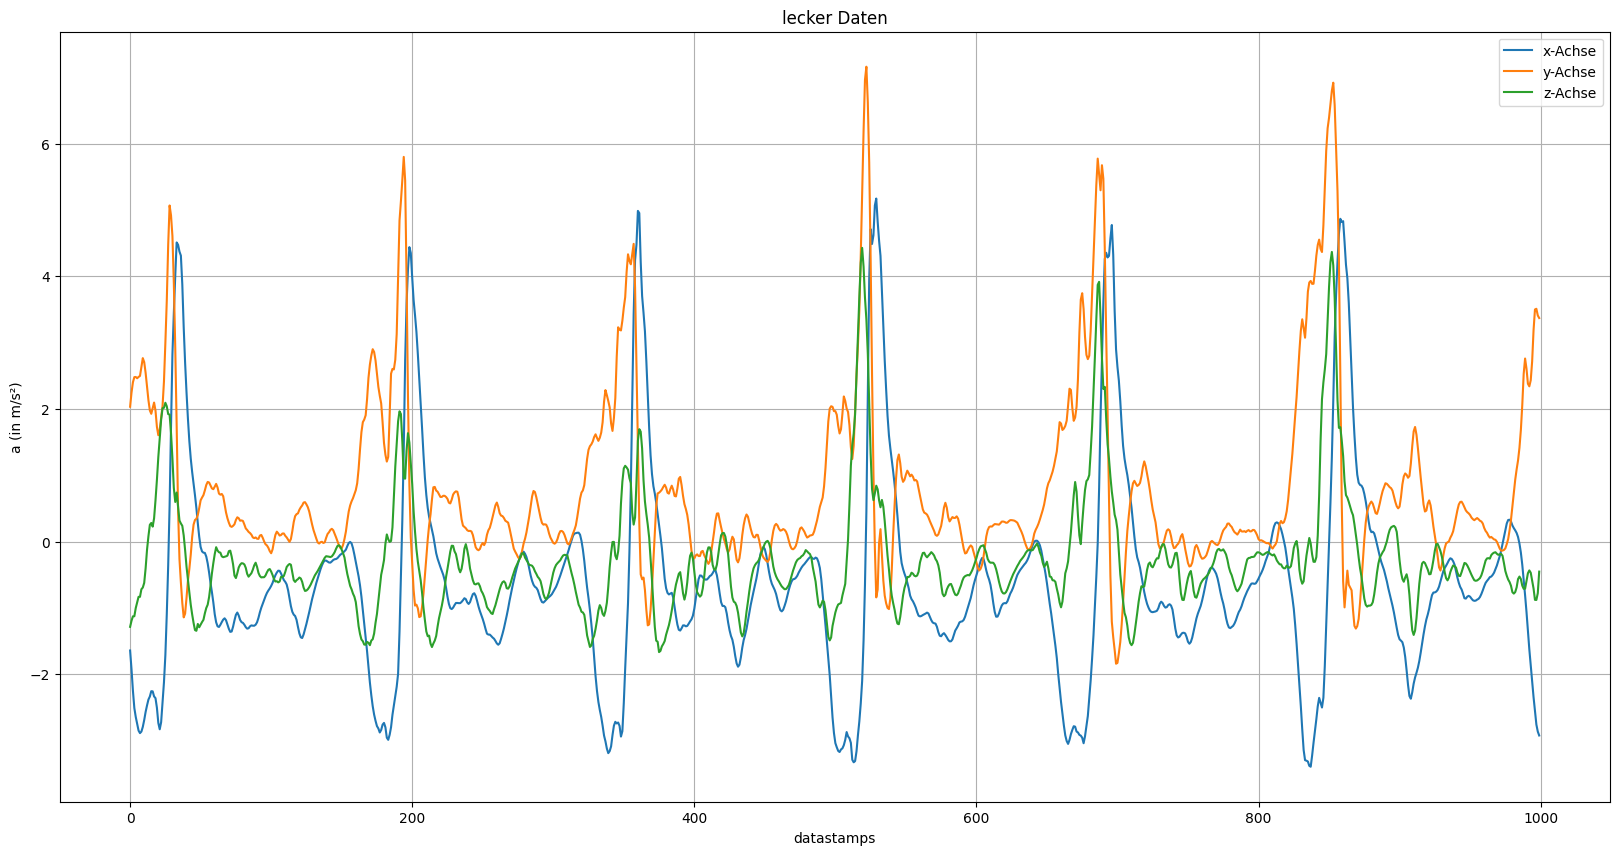

In [4]:
# hier ein Blick auf die Daten
data_preprocessing.plot_ds(data_Ger_Acc[20000:21000])

In [8]:
# autolabeling
"""
Für jeden Datensatz von den Sätzen mit hundert mal den kann jetzt einfach automatisch gelabeled werden. Man muss nur ggf. an den Parametern schrauben und am Anfang und Ende der Daten was abschneiden (data[550:] z.B.). Schaut gerne auch nochmal im Genaueren auf die Funktionsweise von autolabel. In kurz werden Hochpunkte im Datensatz identifiziert, um so die einzelnen Schläge als Dictionary in einer Liste zu speichern. 
"""
labeled_data = data_preprocessing.auto_labeling(data_Ger_Acc,  2, 140, 'Gerade')

     index     timestamp         x         y         z
0       75  7.476802e+08  2.147827  4.413483 -0.022217
1      478  4.765225e+09  2.536972  2.463394  0.192429
2      621  6.190806e+09  3.049332  2.415314  0.428436
3      763  7.606414e+09  1.859665  3.540955  0.221725
4     1205  1.201274e+10  0.706726  3.264084  0.787964
..     ...           ...       ...       ...       ...
176  35944  2.397212e+12  5.834274  6.449234  6.331573
177  36132  2.399086e+12  6.279434  7.288040  5.428955
178  36314  2.400901e+12  4.690201  4.999374  6.730637
179  36494  2.402695e+12  4.733902  6.324280  7.213852
180  36675  2.404500e+12  6.250168  5.986694  5.673767

[181 rows x 5 columns]
276
0. Durchlauf: start:0, ende:276
549
1. Durchlauf: start:277, ende:549
692
2. Durchlauf: start:550, ende:692
984
3. Durchlauf: start:693, ende:984
1540
4. Durchlauf: start:985, ende:1540
2048
5. Durchlauf: start:1541, ende:2048
2382
6. Durchlauf: start:2049, ende:2382
2624
7. Durchlauf: start:2383, ende:2624
286

In [8]:
print(labeled_data[0])

{'label': 'Kinnhaken', 'count': 179, 'periodNS': 1774413750.0012584, 'raws': [{'_id': 0, 'timestamp': 0.0, 'x': 0.739593505859375, 'y': 0.3588104248046875, 'z': -0.5629730224609375}, {'_id': 1, 'timestamp': 9968999.998818617, 'x': 0.728118896484375, 'y': 0.300811767578125, 'z': -0.555084228515625}, {'_id': 2, 'timestamp': 19937000.00093668, 'x': 0.73565673828125, 'y': 0.2602691650390625, 'z': -0.55535888671875}, {'_id': 3, 'timestamp': 29905999.999755293, 'x': 0.740020751953125, 'y': 0.2610015869140625, 'z': -0.5699615478515625}, {'_id': 4, 'timestamp': 39874999.998573914, 'x': 0.7386322021484375, 'y': 0.2683563232421875, 'z': -0.58233642578125}, {'_id': 5, 'timestamp': 49843000.00069197, 'x': 0.72607421875, 'y': 0.2563934326171875, 'z': -0.5607452392578125}, {'_id': 6, 'timestamp': 59811999.999510586, 'x': 0.7158966064453125, 'y': 0.2168121337890625, 'z': -0.5240020751953125}, {'_id': 7, 'timestamp': 69779999.99799067, 'x': 0.7253570556640625, 'y': 0.1752471923828125, 'z': -0.50144958

In [ ]:
# Prüfung ob labeling geklappt hat
"""
Hier wird geprüft, ob das Labeling geklappt hat. Dazu wird ein Plot erstellt. Hier kann man erkennen, ob das auto_labeling sauber die einzelnen Schläge identifiziert hat. Also immer zum Check machen!!
"""
data_preprocessing.plot_ds_element(labeled_data[1])
for i in range(0, len(labeled_data)):
    data_preprocessing.plot_ds_element(labeled_data[i])

In [22]:
# Normalisierung der Daten
"""
Gerne mit periodLengthMS und sampling sampleRateUS rumspielen. Den Effekt von den Variablen könnt ihr in smartPunch_tutorial_ManipulatePeriodLength.ipynb sehen.  
"""

periodLengthMS = 10
sampleRateUS = 100

ds = data_preprocessing.jsonData_to_dataset_in_timedifference_us(labeled_data)

df_new = data_preprocessing.normate_dataset_period(periodLengthMS, sampleRateUS, ds)

Starting new normalization/interpolation...
progress: 0.99 %
progress: 1.98 %
progress: 2.97 %
progress: 3.96 %
progress: 4.95 %
progress: 5.94 %
progress: 6.93 %
progress: 7.92 %
progress: 8.91 %
progress: 9.90 %
progress: 10.89 %
progress: 11.88 %
progress: 12.87 %
progress: 13.86 %
progress: 14.85 %
progress: 15.84 %
progress: 16.83 %
progress: 17.82 %
progress: 18.81 %
progress: 19.80 %
progress: 20.79 %
progress: 21.78 %
progress: 22.77 %
progress: 23.76 %
progress: 24.75 %
progress: 25.74 %
progress: 26.73 %
progress: 27.72 %
progress: 28.71 %
progress: 29.70 %
progress: 30.69 %
progress: 31.68 %
progress: 32.67 %
progress: 33.66 %
progress: 34.65 %
progress: 35.64 %
progress: 36.63 %
progress: 37.62 %
progress: 38.61 %
progress: 39.60 %
progress: 40.59 %
progress: 41.58 %
progress: 42.57 %
progress: 43.56 %
progress: 44.55 %
progress: 45.54 %
progress: 46.53 %
progress: 47.52 %
progress: 48.51 %
progress: 49.50 %
progress: 50.50 %
progress: 51.49 %
progress: 52.48 %
progress: 53

In [23]:
# Daten anschauen
print(df_new)

[            x         y         z  timestamp      label
0    1.537291  2.460916 -0.410071          0  Kinnhaken
1    1.542333  2.463606 -0.411047        100  Kinnhaken
2    1.547377  2.466283 -0.412021        200  Kinnhaken
3    1.552423  2.468950 -0.412996        300  Kinnhaken
4    1.557471  2.471604 -0.413970        400  Kinnhaken
..        ...       ...       ...        ...        ...
96   2.011839  2.646216 -0.499086       9600  Kinnhaken
97   2.016447  2.647313 -0.499842       9700  Kinnhaken
98   2.021044  2.648396 -0.500591       9800  Kinnhaken
99   2.025627  2.649464 -0.501331       9900  Kinnhaken
100  2.030198  2.650517 -0.502062      10000  Kinnhaken

[101 rows x 5 columns],             x         y         z  timestamp      label
0   -4.423089  4.836018  1.631557          0  Kinnhaken
1   -4.433795  4.822920  1.629589        100  Kinnhaken
2   -4.444474  4.809761  1.627673        200  Kinnhaken
3   -4.455127  4.796539  1.625807        300  Kinnhaken
4   -4.465751  4.78325

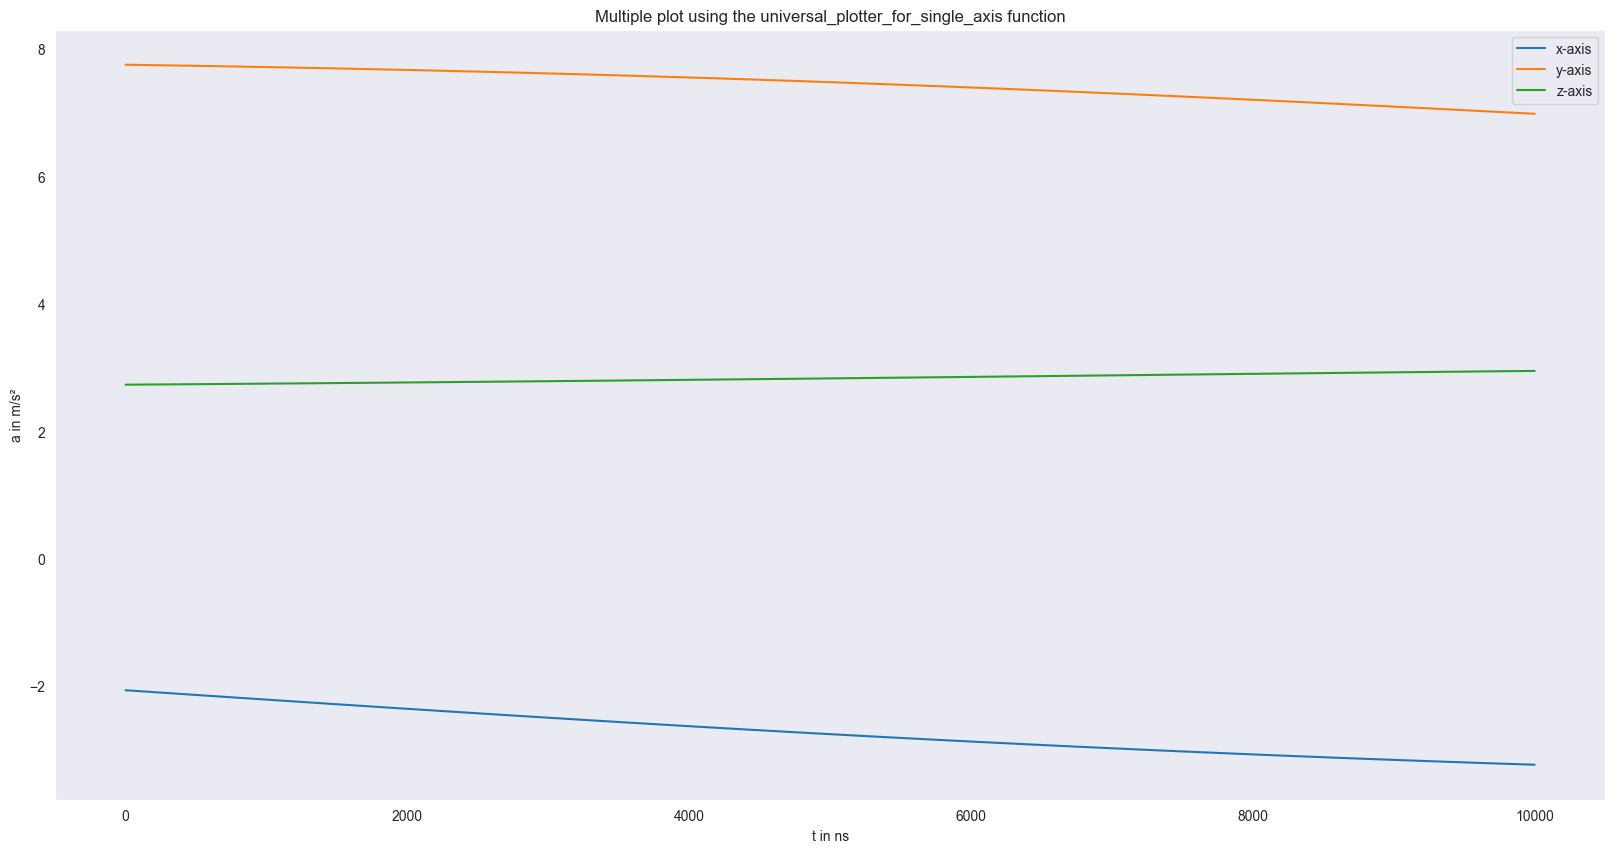

In [24]:
# normalisierte Daten plotten
axis_to_plot = ['x','y','z']
legend_titles_to_plot = ['Punch 1, axis: x','Punch 2, axis: y','Punch 3, axis: z']
plot_title = 'Multiple plot using the universal_plotter_for_single_axis function'
# As the last steps we have to define the general y-axis label and the x-axis label of the plot as **strings**
plot_x_label = 't in ns'
plot_y_label = 'a in m/s²'
data_to_plot = df_new[3]

data_preprocessing.single_plot_all_axis(data_to_plot,plot_title=plot_title,y_axis_label=plot_y_label,x_axis_label=plot_x_label, saveImage=True, imageName='normalisierter_kinnhaken.png')